##### Get a boundary of data to read from, to match OSM region data

In [1]:
import pyrosm

/mnt/c/Users/Alfred/CLionProjects/outbreak-sim/python/venv/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [2]:
# Get London's OpenStreetMap data
fp = pyrosm.get_data("London", update=True)
print(fp)
# Initialize the OSM object 
osm = pyrosm.OSM(fp)

Downloaded Protobuf data 'London.osm.pbf' (66.79 MB) to:
'/tmp/pyrosm/London.osm.pbf'
/tmp/pyrosm/London.osm.pbf


<AxesSubplot:>

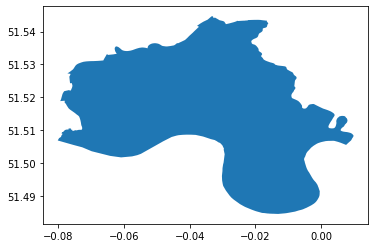

In [34]:
# Read all boundaries using the default settings
boundaries = osm.get_boundaries()

# pick a small subset for testing
boundary = osm.get_boundaries(name="London Borough of Tower Hamlets")
boundary.plot()

##### Load WorldPop Dataset and transform to match boundary

In [28]:
import geopandas as gpd
import rasterio
import rioxarray as rxr
from matplotlib import pyplot as plt

In [33]:
uk_wp = rxr.open_rasterio('./data/gbr_ppp_2020_UNadj_constrained.tif', masked=True).squeeze()
uk_wp.rio.crs  # make sure the crs is EPSG:4326 (WGS84) to match the unprojected OSM boundary

CRS.from_epsg(4326)

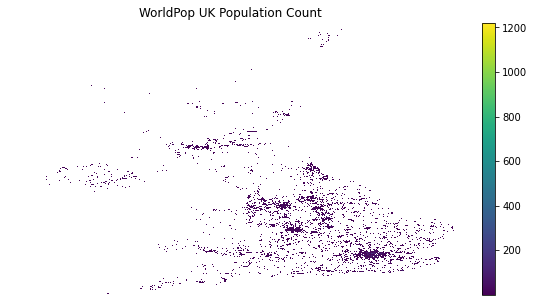

In [30]:
f, ax = plt.subplots(figsize=(10, 5))
uk_wp.plot.imshow()
ax.set(title="WorldPop UK Population Count")

ax.set_axis_off()
plt.show()

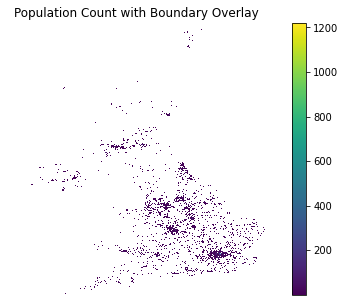

In [35]:
f, ax = plt.subplots(figsize=(10, 5))
uk_wp.plot.imshow(ax=ax)

boundary.plot(ax=ax, alpha=.8)
ax.set(title="Population Count with Boundary Overlay")

ax.set_axis_off()
plt.show()

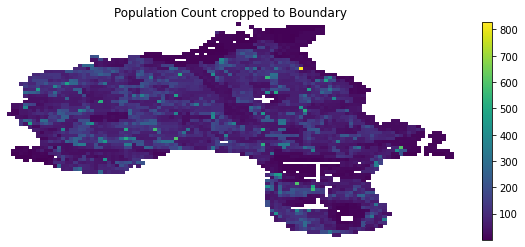

In [36]:
from shapely.geometry import mapping

wp_clipped = uk_wp.rio.clip(boundary.geometry.apply(mapping))

f, ax = plt.subplots(figsize=(10, 4))
wp_clipped.plot(ax=ax)
ax.set(title="Population Count cropped to Boundary")
ax.set_axis_off()
plt.show()

In [37]:
wp_clipped.rio.to_raster('./data/tower_hamlets_wp.tif')